<a href="https://colab.research.google.com/github/Beatoy/INTELIGENCIA-ARTIFICIAL/blob/main/%20MULTICAPA%20/IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= =====

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5935 - loss: 0.9245 - val_accuracy: 0.8000 - val_loss: 0.4283
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8776 - loss: 0.3304 - val_accuracy: 0.9333 - val_loss: 0.2746
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8833 - loss: 0.2864 - val_accuracy: 0.9333 - val_loss: 0.2054
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8622 - loss: 0.2943 - val_accuracy: 0.9667 - val_loss: 0.1563
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9395 - loss: 0.2417 - val_accuracy: 0.9667 - val_loss: 0.1306
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9606 - loss: 0.1288 - val_accuracy: 1.0000 - val_loss: 0.0991
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9335 - loss: 0.1439 - val_accuracy: 1.0000 - val_loss: 0.0898
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9498 - loss: 0.1174 - val_accuracy: 0

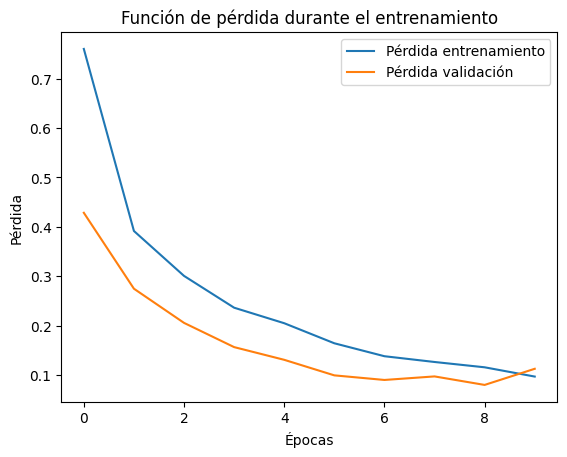

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.9667 - loss: 0.1124
Loss: 0.11240872740745544, Accuracy: 0.9666666388511658
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
   Actual Class Index Actual Flower  Predicted Class Index Predicted Flower
0                   1    versicolor                      1       versicolor
1                   0        setosa                      0           setosa
2                   2     virginica                      2        virginica
3                   1    versicolor                      1       versicolor
4                   1    versicolor                      1       versicolor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 1.0
Class 2: 0.9090909090909091


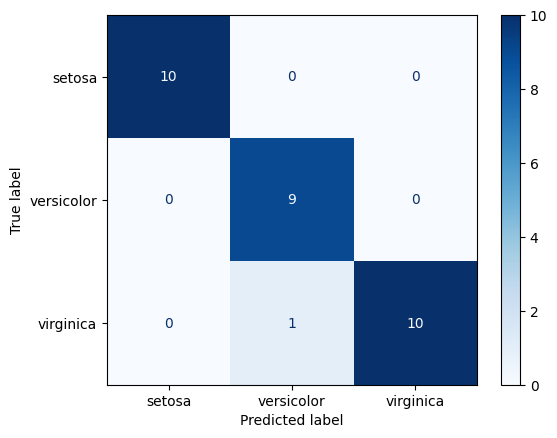

In [1]:


# Carga del dataset Iris
from sklearn.datasets import load_iris
iris = load_iris()

# Mostrar llaves y descripción (útil para saber qué trae el objeto)
print(iris.keys())
print(iris.DESCR)

# Convertir a DataFrame para trabajar más cómodo
import pandas as pd
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df
iris_df.describe()

# PREPROCESAMIENTO
# X: características; y: target en one-hot
X = iris_df
y = pd.get_dummies(iris.target).values  # convierte 0/1/2 a vector binario por clase

# Separar entreno/prueba — 80% train, 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape)
print(X_test.shape)

# Escalado: media 0 y desviación 1 para cada característica
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# RED NEURONAL MULTICAPA (modelo secuencial)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # capa oculta 1
    Dense(32, activation='relu'),                                   # capa oculta 2
    Dense(3, activation='softmax'),                                 # salida: 3 clases
])

# Compilación: Adam con lr=0.001 y pérdida para multiclase
from tensorflow.keras.optimizers import Adam
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

modelo.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ENTRENAMIENTO
# Notas: batch_size=1 para mostrar actualización por muestra (lento pero didáctico)
history = modelo.fit(
    X_train, y_train,
    epochs=10,
    batch_size=1,
    validation_data=(X_test, y_test)
)

# Gráfica de la pérdida (training vs validation)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()

# EVALUACIÓN FINAL en el conjunto de prueba
loss, accuracy = modelo.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# PREDICCIONES
predictions = modelo.predict(X_test)
import numpy as np
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Tabla comparativa: índice y nombre de la flor real vs predicha
comparison = pd.DataFrame({
    'Actual Class Index': actual_classes,
    'Predicted Class Index': predicted_classes
})
comparison['Actual Flower'] = [iris.target_names[i] for i in actual_classes]
comparison['Predicted Flower'] = [iris.target_names[i] for i in predicted_classes]
comparison = comparison[['Actual Class Index', 'Actual Flower',
                         'Predicted Class Index', 'Predicted Flower']]
print(comparison.head())

# MATRIZ DE CONFUSIÓN y RECALL (sensibilidad) por clase
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

y_pred = modelo.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')

print('Sensitivity (Recall) for each class:')
for i in range(3):
    print(f'Class {i}: {sensitivity[i]}')
